In [72]:
import pandas as pd
import numpy as np
from datetime import date
from datetime import datetime
import datetime
import matplotlib
import matplotlib.pyplot as plt

### 数据准备
---
站址能元数据负载 与 站址标杆信息表需要另存一份csv文件而不是Excel自带的xlsx文件。或者保证两张表的站址编码为文本格式，则替换为 Load = pd.read_excel('站址能元数据负载.xlsx')

---
需手动在站址能元数据负载 与 站址标杆信息表中将站址编码那一列的 名称改为 站点编码

---
需手动在20年支付清单的Excel中 导出起始与截止日期的周期天数，日，月，年


In [32]:
Eused2020 = pd.read_excel('20年支付清单.xlsx')
Load = pd.read_csv('站址能元数据负载.csv')
ac = pd.read_csv('站址标杆信息表.csv')
Eused2020_zhigong = pd.read_excel('20年直供.xlsx')

In [33]:
Eused2020 = Eused2020.drop(['省','市','供电用户号','站点名称','支付单号','提单时间','报账单号','供电方名称'
                 ,'公共客商编号','其他应付或减免金额','付款日期','是否换表/复位','换表/复位前读数'
                 ,'换表/复位后读数','票据补录状态','付款方式','区域经理','合同编号','线损金额','增减电量'
                 ,'收款账号','收款户名','开户行名称','摘要','是否抄表报账'], axis=1)

In [34]:
Eused2020_zhigong = Eused2020_zhigong.drop(['省','市','供电用户号','站点名称','支付单号','提单时间','报账单号','供电方名称'
                 ,'公共客商编号','其他应付或减免金额','付款日期','是否换表/复位','换表/复位前读数'
                 ,'换表/复位后读数','票据补录状态','付款方式','区域经理','合同编号','线损金额','增减电量'
                 ,'收款账号','收款户名','开户行名称','摘要','是否抄表报账'], axis=1)

In [35]:
Load = Load.rename(columns={"每月负载": "1月", "Unnamed: 5": "2月", "Unnamed: 6": "3月", "Unnamed: 7": "4月"
                           , "Unnamed: 8": "5月", "Unnamed: 9": "6月", "Unnamed: 10": "7月"
                           , "Unnamed: 11": "8月", "Unnamed: 12": "9月", "Unnamed: 13": "10月"
                           , "Unnamed: 14": "11月", "Unnamed: 15": "12月"})

In [36]:
Load = Load.drop([0])

In [37]:
Load = Load.drop(['运维监控站址ID', '区域', '站址名称'], axis=1)

In [38]:
Load = Load.dropna()

In [39]:
Load['1月'] = Load['1月'].astype('float64') 
Load['2月'] = Load['2月'].astype('float64') 
Load['3月'] = Load['3月'].astype('float64')
Load['4月'] = Load['4月'].astype('float64') 
Load['5月'] = Load['5月'].astype('float64') 
Load['6月'] = Load['6月'].astype('float64') 
Load['7月'] = Load['7月'].astype('float64') 
Load['8月'] = Load['8月'].astype('float64') 
Load['9月'] = Load['9月'].astype('float64') 
Load['10月'] = Load['10月'].astype('float64') 
Load['11月'] = Load['11月'].astype('float64') 
Load['12月'] = Load['12月'].astype('float64') 

In [40]:
Load = Load.replace(0, np.nan)
Load = Load.dropna()

In [41]:
ac = ac.drop(['运维监控站址ID', '区域', '站址名称', '供电类型'], axis=1)

In [42]:
ac = ac.dropna()

In [43]:
ac.dtypes

站点编码      object
年平均负载    float64
机房类型      object
空调类型      object
dtype: object

In [44]:
Load.dtypes

站点编码      object
1月       float64
2月       float64
3月       float64
4月       float64
5月       float64
6月       float64
7月       float64
8月       float64
9月       float64
10月      float64
11月      float64
12月      float64
年平均负载    float64
dtype: object

In [45]:
Eused2020.dtypes

所属区域              object
站点编码              object
电表ID             float64
电表编码              object
供电方式              object
电表倍率             float64
支付电量             float64
平均单价             float64
支付电费金额           float64
购电起始读数           float64
购电截止读数           float64
购电起始日期    datetime64[ns]
购电截止日期    datetime64[ns]
周期天数             float64
起始月              float64
截止月              float64
起始日              float64
截止日              float64
起始年份             float64
截止年份             float64
dtype: object

In [46]:
Eused2020_zhigong.dtypes

所属区域              object
站点编码              object
电表ID             float64
电表编码              object
供电方式              object
电表倍率             float64
支付电量             float64
平均单价             float64
支付电费金额           float64
购电起始读数           float64
购电截止读数           float64
购电起始日期    datetime64[ns]
购电截止日期    datetime64[ns]
周期天数             float64
起始月              float64
截止月              float64
起始日              float64
截止日              float64
起始年份             float64
截止年份             float64
dtype: object

### 合并数据源

In [47]:
combined = Eused2020.append(Eused2020_zhigong)

In [48]:
combined = pd.merge(combined, Load, on=['站点编码','站点编码'], how="left")

In [49]:
combined = pd.merge(combined, ac, on=['站点编码', '站点编码'], how="left")

In [50]:
combined = combined.dropna()

In [51]:
combined

,所属区域,站点编码,电表ID,电表编码,供电方式,电表倍率,支付电量,平均单价,支付电费金额,购电起始读数,...,7月,8月,9月,10月,11月,12月,年平均负载_x,年平均负载_y,机房类型,空调类型
0,长安区,610194500000000017,2262372.0,10164214,转供,1.0,2309.00,1.10,2539.90,100082.0,...,100.93,110.67,109.60,108.24,112.46,114.14,95.43,95.43,一体化机柜,一体化机柜
1,长安区,610194500000000017,5964948.0,610194500000000017新电表,转供,1.0,3123.00,1.10,3435.30,0.0,...,100.93,110.67,109.60,108.24,112.46,114.14,95.43,95.43,一体化机柜,一体化机柜
2,长安区,610194500000000014,2262366.0,1020452835,转供,1.0,8958.00,1.10,9853.80,206550.0,...,83.98,90.93,89.02,86.59,87.08,79.85,59.47,59.47,一体化机柜,一体化机柜
3,长安区,610194500000000013,2262363.0,1020452814,转供,1.0,12542.00,1.10,13796.20,255025.0,...,128.14,129.65,128.11,124.18,123.67,115.88,108.24,108.24,一体化机柜,普通空调柜式
4,长安区,610194500000000009,2486739.0,1020452321,转供,1.0,11257.00,1.10,12382.70,306726.0,...,113.96,123.50,124.71,121.52,122.59,113.14,97.59,97.59,一体化机柜,一体化机柜
5,长安区,610194500000000006,5728918.0,610194500000000006新电表,转供,1.0,11634.00,1.10,12797.40,2413.0,...,59.00,59.00,59.00,59.00,70.94,140.33,66.77,66.77,一体化机柜,一体化机柜
6,雁塔区,610193500000000133,2502908.0,改：3682295,转供,1.0,17000.00,1.20,20400.00,88000.0,...,95.56,93.69,93.02,90.57,93.82,94.73,86.17,86.17,一体化机柜,一体化机柜
7,长安区,610116500000001984,4771342.0,改：1020607924,转供,1.0,7329.00,1.10,8061.90,140282.0,...,153.73,152.63,135.53,116.60,117.37,126.17,123.82,123.82,一体化机柜,普通空调柜式
8,长安区,610116500000000448,3998722.0,60408321,转供,1.0,15408.25,1.20,18489.90,265809.0,...,92.22,83.67,79.23,75.16,78.72,97.93,94.54,94.54,一体化机柜,一体化机柜
9,长安区,610116500000000445,3998723.0,1020904325,转供,1.0,3854.58,1.20,4625.50,93103.0,...,95.28,88.93,89.36,96.15,91.41,92.55,85.09,85.09,一体化机柜,一体化机柜


In [53]:
combined['Eused Within 2020'] = 0
combined['Supposed cost'] = 0
combined['difference ratio'] = 0
combined['合理性'] = 0

In [54]:
combined.drop(combined[combined['起始年份'] == 2021].index, inplace = True)
#combined.drop(combined[combined['起始年份'] == 2019].index, inplace = True)
#combined.drop(combined[combined['起始年份'] == 2018].index, inplace = True)
#combined.drop(combined[combined['截止年份'] == 2021].index, inplace = True)
combined.drop(combined[combined['截止年份'] == 2019].index, inplace = True)
combined.drop(combined[combined['截止年份'] == 2018].index, inplace = True)

In [56]:
combined['起始月'] = combined['起始月'].astype('int')
combined['截止月'] = combined['截止月'].astype('int')
combined['周期天数'] = combined['周期天数'].astype('int')
combined['起始年份'] = combined['起始年份'].astype('int')
combined['截止年份'] = combined['截止年份'].astype('int')

In [57]:
dates = combined['购电起始日期'].values.astype('datetime64[D]')
dates_2 = combined['购电截止日期'].values.astype('datetime64[D]')

In [58]:
combined = combined.reset_index()

周期天数 13 起始月 14 截止月 15 起始日 16 截止日 17 起始年 18 截止年 19 load 一月 20

In [60]:
for x in range(len(combined)-1):
    supposed_cost = 0
    both2020cost = combined['支付电量'][x]
    diff = 0
    diff2 = 0
    original_changed = 0
    new_starting_month = combined['起始月'][x]
    new_ending_month = combined['截止月'][x]
    avg_cost = combined['支付电量'][x] / combined['周期天数'][x]
    if combined['起始日'][x] > 15:
        new_starting_month = combined['起始月'][x] + 1
        #new_ending_month = combined_test.iloc[x,18]
    if combined['截止日'][x] < 15:
        new_ending_month = combined['截止月'][x] - 1
    if combined['起始年份'][x] != 2020:
        #dates = combined['购电起始日期'].values.astype('datetime64[D]')
        diff = (np.datetime64('2020-01-01') - dates[x]).astype('int')
        new_starting_month = 1
    if combined['截止年份'][x] != 2020:
        #dates_2 = combined['购电截止日期'].values.astype('datetime64[D]')
        diff2 = (dates_2[x] - np.datetime64('2020-12-31')).astype('int')
        new_ending_month = 12
    #avg_cost = combined.iloc[x,7] / combined.iloc[x,16]
    for y in range(new_ending_month - new_starting_month + 1):
        #此处犯下的错误：load里面若是仅仅通过【一月+y】则相当于每一条用的都是1月load，故改为【1月前一个+new——starting+y】
        supposed_cost = supposed_cost + (54*combined.iloc[x,19+new_starting_month+y]*24*30)/1000
        if combined['机房类型'][x] == '一体化机柜':
            supposed_cost = supposed_cost + (54*combined.iloc[x,19+new_starting_month+y]*24*30)/1000
        elif combined['空调类型'][x] == '专用空调' or combined['空调类型'][x] == '普通空调柜式':
            supposed_cost = supposed_cost + 2600
        elif combined['空调类型'][x] == '普通空调壁挂':
            supposed_cost = supposed_cost + 790
        elif combined['空调类型'][x] == '智能通风设备':
            supposed_cost = supposed_cost
    
    combined['Eused Within 2020'][x] = both2020cost
    combined['Supposed cost'][x] = supposed_cost
    #combined.iloc[x,41] = (both2020cost - supposed_cost) / supposed_cost
                                           
    if diff != 0:
        supposed_cost = supposed_cost * ((combined['周期天数'][x] - diff) / combined['周期天数'][x])
        original_changed = avg_cost * (combined['周期天数'][x] - diff)
        combined['Eused Within 2020'][x] = original_changed
        combined['Supposed cost'][x] = supposed_cost
        #combined.iloc[x,41] = (original_changed - supposed_cost) / supposed_cost
    if diff2 != 0:
        supposed_cost = supposed_cost * ((combined['周期天数'][x] - diff2) / combined['周期天数'][x])
        original_changed = avg_cost * (combined['周期天数'][x] - diff2)
        combined['Eused Within 2020'][x] = original_changed
        combined['Supposed cost'][x] = supposed_cost
        #combined.iloc[x,41] = (original_changed - supposed_cost) / supposed_cost
    if  new_starting_month >= new_ending_month:
        #think：((54*combined.iloc[x,19+new_ending_month]*24*30)/1000) * combined['周期天数'][x] / 30x
        supposed_cost = supposed_cost + ((54*combined.iloc[x,19+new_ending_month]*24*30)/1000) * combined['周期天数'][x] / 1000
        combined['Supposed cost'][x] = supposed_cost
    
        
    #combined.iloc[x,41] = (avg_cost * (combined.iloc[x,16]) - supposed_cost) / supposed_cost

    #combined.iloc[x,38] = supposed_cost * combined.iloc[x,8]
    #combined.iloc[x,39] = (combined.iloc[x,9] - combined.iloc[x,38]) / combined.iloc[x,38]

/Users/haizhouli/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/haizhouli/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/haizhouli/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/haizhouli/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value i

In [121]:
#combined.to_excel('combined_original4.0.xlsx')

In [63]:
combined['合理性'] = combined['合理性'].astype('str')

In [64]:
for x in range(len(combined)-1):
    if abs(combined['difference ratio'][x]) < 0.2:
        combined['合理性'][x] = '合理'
    elif 0.2 <= combined['difference ratio'][x] <= 0.5:
        combined['合理性'][x] = '小于50%合理'
    elif 1 > combined['difference ratio'][x] > 0.5:
        combined['合理性'][x] = '大于50%不正常'
    elif combined['difference ratio'][x] > 1:
        combined['合理性'][x] = '不合理'
    elif -0.2 > combined['difference ratio'][x] > -0.5:
        combined['合理性'][x] = '大于-50%合理'
    elif combined['difference ratio'][x] < -0.5:
        combined['合理性'][x] = '小于-50%不合理'
    else:
        combined['合理性'][x] = 0

/Users/haizhouli/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [66]:
combined = pd.read_excel('Final_version1.0.xlsx')

In [67]:
gy = combined.groupby('所属区域')
gy.size()

所属区域
东区      1258
中区        86
临渭北       12
临潼区     1418
北区      2176
南区       990
周杨区域    1816
户县      1558
新城区      654
曲江区      658
未央区      766
沣东区     1044
沣渭区        2
渭城区       12
港务区     1340
灞桥区      760
碑林区      512
秦都区        8
经开区     1006
莲湖区      796
蓝田县      396
西区      1298
迁安市        2
长安区     2874
雁塔区      816
高新区      698
高阎区域    1528
dtype: int64

In [70]:
Dongqu = combined[combined['所属区域'] == '东区']
Zhongqu = combined[combined['所属区域'] == '中区']
Lintong = combined[combined['所属区域'] == '临潼区']
Beiqu = combined[combined['所属区域'] == '北区']
Nanqu = combined[combined['所属区域'] == '南区']
Zhouyang = combined[combined['所属区域'] == '周杨区域']
Huxian = combined[combined['所属区域'] == '户县']
Xincheng = combined[combined['所属区域'] == '新城区']
Qujiang = combined[combined['所属区域'] == '曲江区']
Weiyang = combined[combined['所属区域'] == '未央区']
Gangwu = combined[combined['所属区域'] == '港务区']
Baqiao = combined[combined['所属区域'] == '灞桥区']
Beilin = combined[combined['所属区域'] == '碑林区']
Jingkai = combined[combined['所属区域'] == '经开区']
Lianhu = combined[combined['所属区域'] == '莲湖区']
Lantian = combined[combined['所属区域'] == '蓝田县']
Xiqu = combined[combined['所属区域'] == '西区']
Changan = combined[combined['所属区域'] == '长安区']
Yanta = combined[combined['所属区域'] == '雁塔区']
Gaoxin = combined[combined['所属区域'] == '高新区']
Gaoyan = combined[combined['所属区域'] == '高阎区域']

In [83]:
df = pd.read_excel('合理性1.0.xlsx')

In [87]:
df.不合理.plot.bar

<bound method SeriesPlotMethods.bar of <pandas.plotting._core.SeriesPlotMethods object at 0x7fe353764438>>

Text(0.5, 0, 'Hello World')

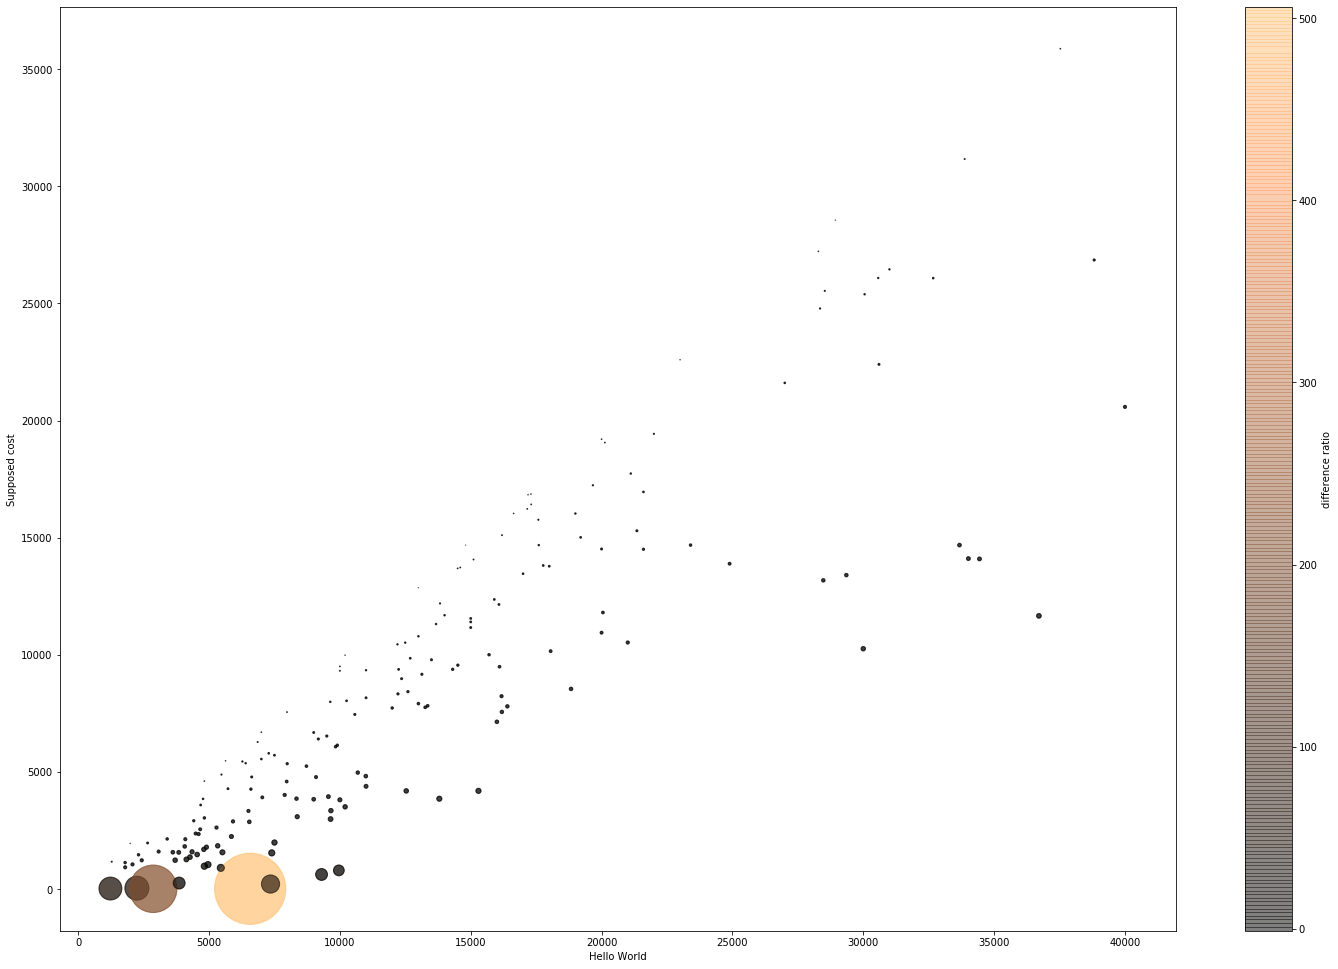

In [80]:
p = Dongqu.plot.scatter(x = 'Eused Within 2020', y = 'Supposed cost', s = Dongqu['difference ratio']*10, c= 'difference ratio', colormap = plt.cm.copper, figsize = (25, 17), alpha = 0.5, sharex = False)
p.set_xlabel("东区电费合理性")